## Logistic Regression using Gradient Descent

We've learned a lot of theories in the previous notebook, but just like what Richard Feynman used to say, "What I cannot create, I do not understand", so let's try to implement our own Logistic Regression algorithm from scratch. We're now going to predict whether a student is admitted or not based on their exam scores.

First, let's load up the exam data

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

df = pd.read_csv('Data/examdata.csv', header = None)
df.rename(columns = {0: 'exam1', 1: 'exam2', 2: 'y'}, inplace = True)
df.head()

,exam1,exam2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


It's a good habit to visualize our data in a scatterplot before proceeding

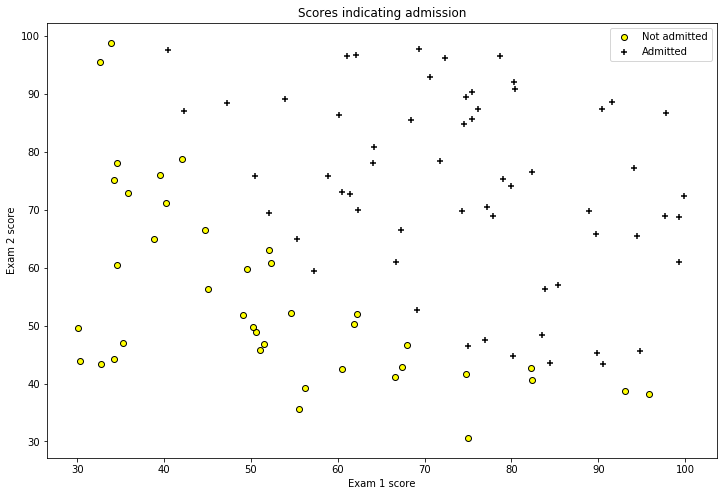

In [2]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(df[df['y'] == 0]['exam1'], df[df['y'] == 0]['exam2'],
            label = 'Not admitted', color = 'yellow', edgecolor = 'black')
plt.scatter(df[df['y'] == 1]['exam1'], df[df['y'] == 1]['exam2'],
            label = 'Admitted', marker = '+', color = 'black')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')
plt.title('Scores indicating admission')
plt.show()

Hmm, looks pretty separable

## Implementation
Now let's implement our Logistic Regression

In [3]:
class LogisticRegression:
    def __init__(self, eta = 0.01, epoch = 15000):
        self.eta   = eta
        self.epoch = epoch

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.costs   = []

        for _ in range(self.epoch):
            output = self.sigmoid(self.net_input(X))
            errors = y - output
            self.weights[1:] += self.eta * X.T.dot(errors)
            self.weights[0]  += self.eta * errors.sum()
            cost = self.cost(X, y)
            self.costs.append(cost)
        return self

    @staticmethod
    def sigmoid(X):
        return 1 / (1 + np.exp(-X))

    def cost(self, X, y):
        net_input = self.net_input(X)
        net_input_pos = net_input[y == 1]
        net_input_neg = net_input[y == 0]
        cost = - (1 / X.shape[0]) \
                * (np.sum(np.log(self.sigmoid(net_input_pos) + 10**(-16))) 
                    + np.sum(np.log(1 - self.sigmoid(net_input_neg) + 10**(-16))))
        return cost

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X, threshold = 0.5):
        return self.sigmoid(self.net_input(X)) >= threshold

In [4]:
lr = LogisticRegression(eta=0.00001, epoch=1000000)
lr = lr.fit(df[['exam1', 'exam2']].values, df['y'].values)

In [5]:
col1 = "exam1"
col2 = "exam2"
min_ex1 = df[col1].min()
max_ex1 = df[col1].max()

min_ex2 = df[col2].min()
max_ex2 = df[col2].max()

arange_step = 0.1

xx, yy = np.meshgrid(np.arange(min_ex1, max_ex1, arange_step), 
                     np.arange(min_ex2, max_ex2, arange_step))
preds = np.c_[xx.ravel(), yy.ravel()]
preds = lr.predict(preds)
preds = preds.reshape(xx.shape)

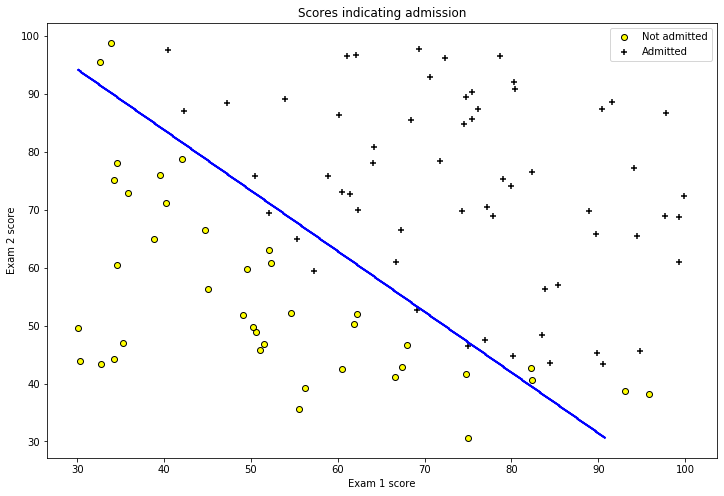

In [6]:
# Plotting the prediction line
fig = plt.figure(figsize = (12, 8))
plt.scatter(df[df['y'] == 0][col1], df[df['y'] == 0][col2],
            label = 'Not admitted', color = 'yellow', edgecolor = 'black')
plt.scatter(df[df['y'] == 1][col1], df[df['y'] == 1][col2],
            label = 'Admitted', marker = '+', color = 'black')
plt.contour(xx, yy, preds, colors = 'blue')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')
plt.title('Scores indicating admission')
plt.show()